In [1]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
True


In [4]:
messages = [line for line in open('SMSSpamCollection_data')]

In [6]:
print(len(messages))

5574


In [8]:
#To see message number, label and the message
for message_no, message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



1 ham	Ok lar... Joking wif u oni...



2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's



3 ham	U dun say so early hor... U c already then say...



4 ham	Nah I don't think he goes to usf, he lives around here though



5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv



6 ham	Even my brother is not like to speak with me. They treat me like aids patent.



7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune



8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [9]:
import pandas as pd

In [13]:
message_data = pd.read_csv('SMSSpamCollection_data', sep='\t',names=['Label','Message'])

In [14]:
message_data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Exploratory Data Analysis

In [16]:
message_data.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
message_data.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [19]:
#Creating another column to count message length
message_data['Length'] = message_data['Message'].apply(len)

In [20]:
message_data.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Data visualisation

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

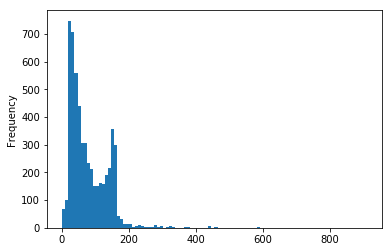

In [28]:
message_data['Length'].plot(bins=100,kind='hist')

In [37]:
#Full message
message_data[message_data['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EDDB4C278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000019EDDB87860>], dtype=object)

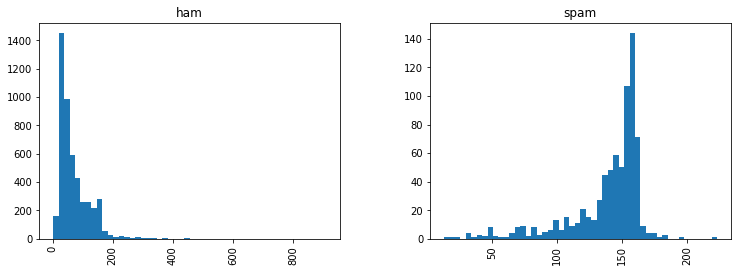

In [40]:
message_data.hist(column='Length',by='Label',bins=50,figsize=(12,4))

The length of spam messages are more than ham messages

Data Preprocessing

In [48]:
import string
from nltk.corpus import stopwords

Remove punctuation, remove stopwords

In [49]:
def text_process(message):
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [50]:
message_data['Message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bag_of_words_tansf = CountVectorizer(analyzer=text_process).fit(message_data['Message'])

In [68]:
print(bag_of_words_tansf)

CountVectorizer(analyzer=<function text_process at 0x0000019EDDCFB730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)


In [69]:
print(len(bag_of_words_tansf.vocabulary_))

11425


In [91]:
#Lets check CountVectorizer
ex_mess = message_data['Message'][4]

In [92]:
ex_mess

"Nah I don't think he goes to usf, he lives around here though"

In [112]:
ex_mess = bag_of_words_tansf.transform([ex_mess])

In [94]:
mess_bow_trasf = bag_of_words_tansf.transform(message_data['Message'])

In [96]:
mess_bow_trasf

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [100]:
sparsity = (100.0 * mess_bow_trasf.nnz / (mess_bow_trasf.shape[0] * mess_bow_trasf.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [103]:
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
tfidf = TfidfTransformer().fit(mess_bow_trasf)
tfidf_ = tfidf.transform(mess_bow_trasf) 

In [108]:
tfidf_.shape

(5572, 11425)

In [109]:
#machine Learning
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tfidf_, message_data['Label'])

In [114]:
pred = spam_detect_model.predict(ex_mess)

In [115]:
print(pred)

['ham']


In [117]:
print(message_data.Label[4])

ham


Checking with an example

In [118]:
spam_mess_ex ='IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

In [119]:
spam_mess_ex = bag_of_words_tansf.transform([spam_mess_ex])

In [121]:
print(spam_detect_model.predict(spam_mess_ex))

['spam']


In [124]:
all_predictions = spam_detect_model.predict(tfidf_)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [126]:
#Model evaluation
from sklearn.metrics import classification_report
print (classification_report(message_data['Label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [127]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(message_data['Message'], message_data['Label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [128]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [129]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000019EDDCFB730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [130]:
predictions = pipeline.predict(msg_test)

In [131]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98       989
       spam       0.77      1.00      0.87       126

avg / total       0.97      0.97      0.97      1115

